In [1]:
import sys
print(sys.version)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

3.7.5 (v3.7.5:5c02a39a0b, Dec 27 2019, 11:41:00) 
[GCC 6.3.0 20170516]


[0.+0.j 1.-0.j 0.+0.j 0.+0.j]


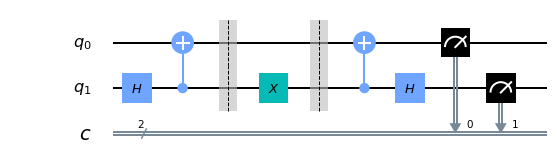

In [10]:
# Superdense Coding Circuit using a bell pair

amount_of_qbits = 2
amount_of_cbits = 2

INFORMATION = 1 # a number betwee 0 and 3, inclusive

# build the main circuit
circuit = QuantumCircuit(amount_of_qbits, amount_of_cbits)

# initialization - create a bell pair
circuit.h(1)
circuit.cnot(1,0)

circuit.barrier()

# encode information
## check LSB
if INFORMATION % 2:
    circuit.x(1)
## check higher bit
if INFORMATION >> 1:
    circuit.z(1)

circuit.barrier()

# decode information : un-entangle
circuit.cnot(1,0)
circuit.h(1)
a = circuit.measure([0,1], [0,1])

simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
outputstate = result.get_statevector(circuit, decimals=3)
print(outputstate)

# Draw the circuit
circuit.draw(output="mpl")


In [19]:
index_to_psi = {
    0: 1, # psi_1 comes from |000>
    4: 2, # psi_2 comes from |100>
    3: 3, # psi_3 comes from |011>
    7: 4, # psi_4 comes from |111>
    2: 5, # psi_5 comes from |010>
    6: 6, # psi_6 comes from |110>
    1: 7, # psi_7 comes from |001>
    5: 8, # psi_8 comes from |101>
}
def vec_to_psi_index(v):
    value = np.where(v == 1)[0][0]
    return index_to_psi[value]

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.-0.j 0.+0.j 0.+0.j 0.+0.j]
2


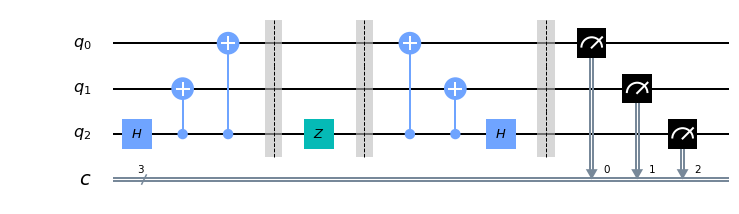

In [28]:
# Superdense Coding Circuit using a GHZ triplet

amount_of_qbits = 3
amount_of_cbits = 3

INFORMATION = 2 # a number betwee 0 and 3, inclusive

# build the main circuit
circuit = QuantumCircuit(amount_of_qbits, amount_of_cbits)

# initialization - create a bell pair
circuit.h(2)
circuit.cnot(2,1)
circuit.cnot(2,0)

circuit.barrier()

# encode information
## check LSB
if INFORMATION % 2:
    circuit.x(2)
## check higher bit
if INFORMATION >> 1:
    circuit.z(2)

circuit.barrier()

# decode information : un-entangle
circuit.cnot(2,0)
circuit.cnot(2,1)
circuit.h(2)
circuit.barrier()
a = circuit.measure([0,1,2], [0,1,2])

simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
outputstate = result.get_statevector(circuit, decimals=3)
print(outputstate)
print(vec_to_psi_index(outputstate))

# Draw the circuit
circuit.draw(output="mpl")


[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.-0.j 0.+0.j 0.+0.j]
8


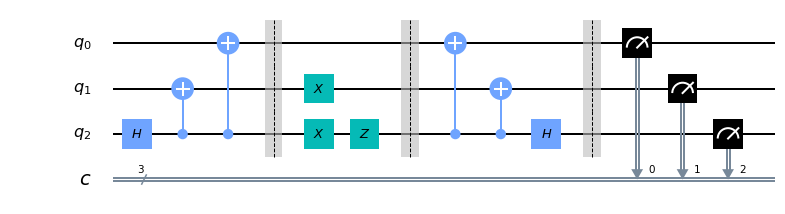

In [27]:
# Superdense Coding Circuit using a GHZ triplet

amount_of_qbits = 3
amount_of_cbits = 3

INFORMATION = 7 # a number betwee 0 and 7, inclusive

# build the main circuit
circuit = QuantumCircuit(amount_of_qbits, amount_of_cbits)

# initialization - create a bell pair
circuit.h(2)
circuit.cnot(2,1)
circuit.cnot(2,0)

circuit.barrier()

# encode information
if (INFORMATION >> 1) % 2:
    circuit.x(2)
if (INFORMATION >> 2):
    circuit.x(1)
if INFORMATION % 2:
    circuit.z(2)

circuit.barrier()

# decode information : un-entangle
circuit.cnot(2,0)
circuit.cnot(2,1)
circuit.h(2)
circuit.barrier()
a = circuit.measure([0,1,2], [0,1,2])

simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
outputstate = result.get_statevector(circuit, decimals=3)
print(outputstate)
print(vec_to_psi_index(outputstate))
# Draw the circuit
circuit.draw(output="mpl")
